In [6]:
%matplotlib inline
import openml as oml
import seaborn as sns
import pandas as pd
from matplotlib import pyplot
from openml import evaluations

benchmark_suite = oml.study.get_study('OpenML100','tasks') # obtain the benchmark suite

# Download and group the evaluation data
scores = []
for task_id in benchmark_suite.tasks: # iterate over all tasks. Can be removed if list_evaluations used paging!
    evaluations = oml.evaluations.list_evaluations(task=[task_id], function='area_under_roc_curve', size=200)
    for id, e in evaluations.items():
        scores.append({"dataset":e.data_name, "score":e.value})

In [33]:
median_scores = pd.DataFrame(scores).groupby(['dataset']).median().sort('score')
median_scores

,score
dataset,
Amazon_employee_access,0.500000
hill-valley,0.517015
analcatdata_dmft,0.532562
KDDCup09_churn,0.552650
dresses-sales,0.574351
climate-model-simulation-crashes,0.619038
profb,0.638316
ilpd,0.652954
cmc,0.660382


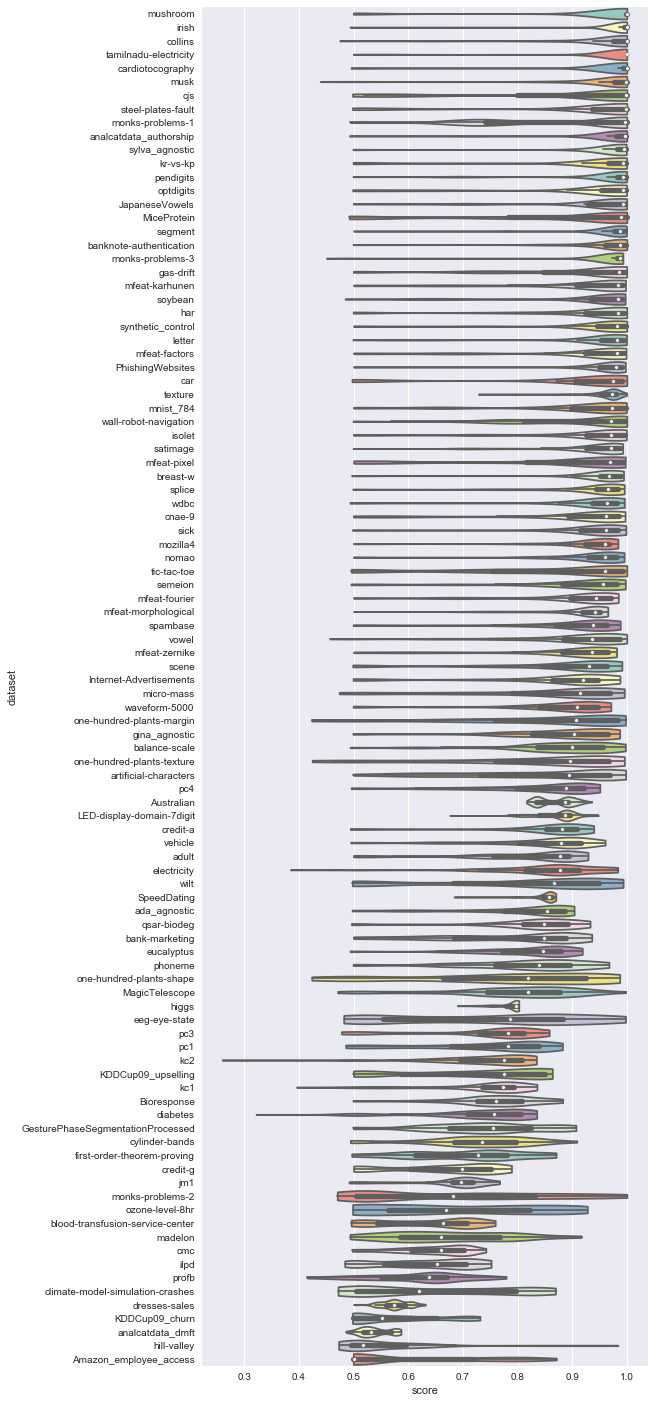

In [31]:
# plot the scores
sorted_score = sorted(scores, key=lambda x: -median_scores['score'][x["dataset"]])
fig, ax = pyplot.subplots(figsize=(8, 25))  
sns.violinplot(ax=ax, x="score", y="dataset", data=pd.DataFrame(sorted_score), scale="count", palette="Set3", cut=0);